In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

{'n_neighbors': 6}
[0 0 0 0 0 0 0]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


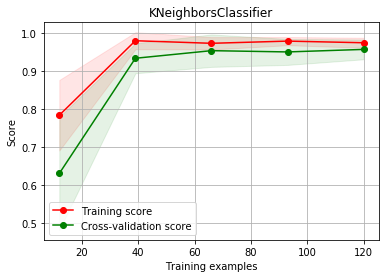

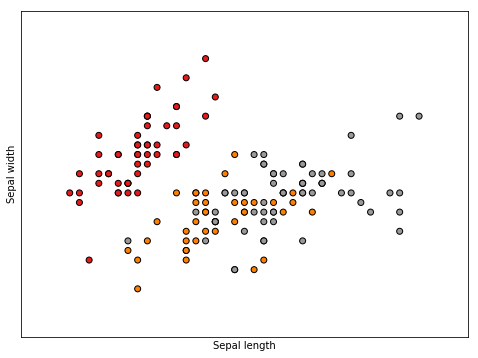

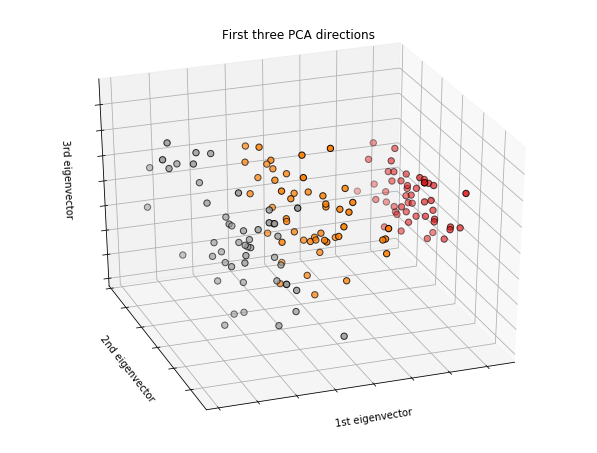

In [50]:

#Iris
#Метод к ближацших соседей

#clf =KNeighborsClassifier(n_neighbors=3)
#partial=clf.fit(X, Y)
#print(partial)


data = load_iris()
X=data.data
Y=data.target
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Установить классификатор knn с k соседями
    clf = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    clf.fit(X,Y)
    #Точность вычислений на тренировочном наборе
    train_accuracy[i] = clf.score(X, Y)
    #Compute accuracy on the test set
    test_accuracy[i] = clf.score(X, Y)

param_grid = {'n_neighbors':np.arange(1,50)}
clf = KNeighborsClassifier()
clf_cv= GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X,Y)
n=clf_cv.best_params_
best=max(n.values())
print(n)

clf =KNeighborsClassifier(n_neighbors=best)
clf.fit(X, Y)
print(clf.predict(X[:7]))
print((X[:7]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


# График
X = data.data[:, :2]  # берем только первые две функции
Y= data.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


plt.figure(2, figsize=(8, 6))
plt.clf()

# График тренировочных точек
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# построение первых трёх измерений 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

[0 0 0 0 0]
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333]


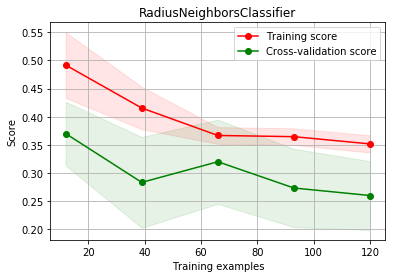

In [51]:
#Метод парзеновского окна

clf=RadiusNeighborsClassifier(radius=5.0)
clf.fit(X,Y)
print(clf.predict(X[:5]))
print((X[:5]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("RadiusNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


In [40]:
#Алгоритм STOLP для отбора эталонных объектов

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


Titanic scatter


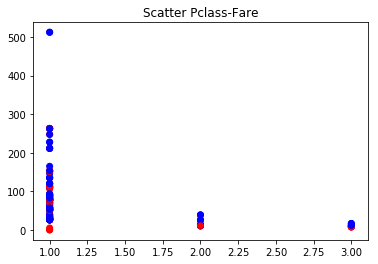

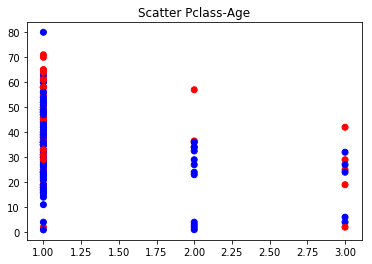

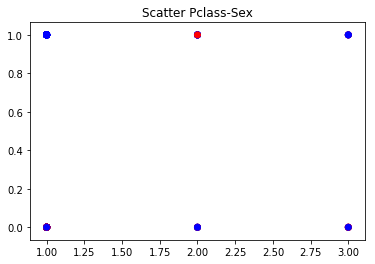

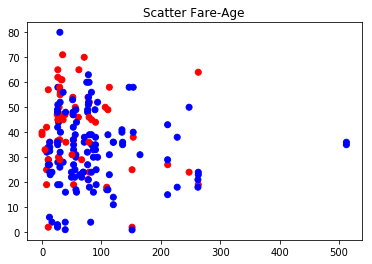

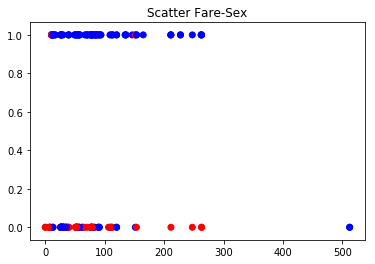

{'n_neighbors': 23}
732
[1 1 1 1 0 1 1]
Do they survived?
[1 1 1 1 1]
    Pclass      Fare   Age  Sex
21       2   13.0000  34.0    0
23       1   35.5000  28.0    0
27       1  263.0000  19.0    0
52       1   76.7292  49.0    1
54       1   61.9792  65.0    0
62       1   83.4750  45.0    0
[0.63157895 0.63157895 0.78947368 0.72222222 0.61111111 0.66666667
 0.72222222 0.72222222 0.61111111 0.61111111]


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\ProgramData\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x0000021099189390, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x0000021099189390, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\ProgramData\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-37.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\ProgramD...a3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    518         sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    519                                finalizer=self._asyncgen_finalizer_hook)
    520         try:
    521             events._set_running_loop(self)
    522             while True:
--> 523                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    524                 if self._stopping:
    525                     break
    526         finally:
    527             self._stopping = False

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1753                         logger.warning('Executing %s took %.3f seconds',
   1754                                        _format_handle(handle), dt)
   1755                 finally:
   1756                     self._current_handle = None
   1757             else:
-> 1758                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(816, 1)>>
   1759         handle = None  # Needed to break cycles when an exception occurs.
   1760 
   1761     def _set_coroutine_origin_tracking(self, enabled):
   1762         if bool(enabled) == bool(self._coroutine_origin_tracking_enabled):

...........................................................................
C:\ProgramData\Anaconda3\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(816, 1)>)
     83     def cancelled(self):
     84         return self._cancelled
     85 
     86     def _run(self):
     87         try:
---> 88             self._context.run(self._callback, *self._args)
        self._context.run = <built-in method run of Context object>
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (816, 1)
     89         except Exception as exc:
     90             cb = format_helpers._format_callback_source(
     91                 self._callback, self._args)
     92             msg = f'Exception in callback {cb}'

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=816, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 5, 6, 12, 8, 19, 411951, tzinfo=tzutc()), 'msg_id': '81d19b1a34c44a7c8334e568409305c3', 'msg_type': 'execute_request', 'session': '68152850b07e46a7956650020e2036dd', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '81d19b1a34c44a7c8334e568409305c3', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'68152850b07e46a7956650020e2036dd']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 5, 6, 12, 8, 19, 411951, tzinfo=tzutc()), 'msg_id': '81d19b1a34c44a7c8334e568409305c3', 'msg_type': 'execute_request', 'session': '68152850b07e46a7956650020e2036dd', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '81d19b1a34c44a7c8334e568409305c3', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'68152850b07e46a7956650020e2036dd'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 5, 6, 12, 8, 19, 411951, tzinfo=tzutc()), 'msg_id': '81d19b1a34c44a7c8334e568409305c3', 'msg_type': 'execute_request', 'session': '68152850b07e46a7956650020e2036dd', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '81d19b1a34c44a7c8334e568409305c3', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, ...], cell_name='<ipython-input-52-d70b5a687f55>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 210a070b048, executio...rue silent=False shell_futures=True> result=None>)
   2896             raise ValueError("Interactivity was %r" % interactivity)
   2897         try:
   2898             for i, node in enumerate(to_run_exec):
   2899                 mod = ast.Module([node])
   2900                 code = compiler(mod, cell_name, "exec")
-> 2901                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x00000210A0C31810, file "<ipython-input-52-d70b5a687f55>", line 87>
        result = <ExecutionResult object at 210a070b048, executio...rue silent=False shell_futures=True> result=None>
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x00000210A0C31810, file "<ipython-input-52-d70b5a687f55>", line 87>, result=<ExecutionResult object at 210a070b048, executio...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x00000210A0C31810, file "<ipython-input-52-d70b5a687f55>", line 87>
        self.user_global_ns = {'Axes3D': <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nfrom skle...antAnalysis\nfrom sklearn.decomposition import PCA', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'import numpy as np\nimport pandas as pd\nfrom skle...\nfrom sklearn.model_selection import GridSearchCV', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'import numpy as np\nimport pandas as pd\nfrom skle...\nfrom sklearn.model_selection import GridSearchCV', 'import numpy as np\nimport pandas as pd\nfrom skle...rom sklearn.neighbors import KNeighborsClassifier', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', 'from sklearn.neighbors import KNeighborsClassifi...ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'from sklearn.neighbors import KNeighborsClassifi...ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'KernelDensity': <class 'sklearn.neighbors.kde.KernelDensity'>, 'LinearDiscriminantAnalysis': <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, 'Out': {}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RadiusNeighborsClassifier': <class 'sklearn.neighbors.classification.RadiusNeighborsClassifier'>, 'ShuffleSplit': <class 'sklearn.model_selection._split.ShuffleSplit'>, ...}
        self.user_ns = {'Axes3D': <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import numpy as np\nimport pandas as pd\nfrom skle...antAnalysis\nfrom sklearn.decomposition import PCA', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'import numpy as np\nimport pandas as pd\nfrom skle...\nfrom sklearn.model_selection import GridSearchCV', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'import numpy as np\nimport pandas as pd\nfrom skle...\nfrom sklearn.model_selection import GridSearchCV', 'import numpy as np\nimport pandas as pd\nfrom skle...rom sklearn.neighbors import KNeighborsClassifier', '# titanic\n#Метод к ближацших соседей\n\ndata = pd....ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', '#РАК\n# к ближайших соседей\nfrom sklearn.neighbor...ation score")\n\nplt.legend(loc="best")\n\nplt.show()', 'from sklearn.neighbors import KNeighborsClassifi...ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', 'from sklearn.neighbors import KNeighborsClassifi...ector")\nax.w_zaxis.set_ticklabels([])\n\nplt.show()', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'KernelDensity': <class 'sklearn.neighbors.kde.KernelDensity'>, 'LinearDiscriminantAnalysis': <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, 'Out': {}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'RadiusNeighborsClassifier': <class 'sklearn.neighbors.classification.RadiusNeighborsClassifier'>, 'ShuffleSplit': <class 'sklearn.model_selection._split.ShuffleSplit'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
C:\Users\Валентина\<ipython-input-52-d70b5a687f55> in <module>()
     83 plt.xlabel("Training examples")
     84 plt.ylabel("Score")
     85 cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
     86 train_sizes=np.linspace(.1, 1.0, 10)
     87 train_sizes, train_scores, test_scores = learning_curve(
---> 88         clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
     89 train_scores_mean = np.mean(train_scores, axis=1)
     90 train_scores_std = np.std(train_scores, axis=1)
     91 test_scores_mean = np.mean(test_scores, axis=1)
     92 test_scores_std = np.std(test_scores, axis=1)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in learning_curve(estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'), X=     Pclass      Fare   Age  Sex
1         1   7...   1   30.0000  26.0    0

[183 rows x 4 columns], y=1      1
3      1
6      0
10     1
11     1
21 ...89    1
Name: Survived, Length: 183, dtype: int64, groups=None, train_sizes=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), cv=ShuffleSplit(n_splits=10, random_state=241, test_size=0.2, train_size=None), scoring=None, exploit_incremental_learning=False, n_jobs=4, pre_dispatch='all', verbose=0, shuffle=False, random_state=None)
   1123                 train_test_proportions.append((train[:n_train_samples], test))
   1124 
   1125         out = parallel(delayed(_fit_and_score)(
   1126             clone(estimator), X, y, scorer, train, test,
   1127             verbose, parameters=None, fit_params=None, return_train_score=True)
-> 1128             for train, test in train_test_proportions)
        train = array([111, 140,   3,  98,  56,  24, 178,  67,  ...,  73, 131, 105, 163, 181,
       123, 128, 124])
        test = array([144,  94, 172,  89,  57,  82, 120, 147,  ...42,  16, 160, 157, 166,  90,  97, 162,  60,  39])
        train_test_proportions = [(array([103, 140,  37,  59,  10, 127,  87,   9,  75, 169,  16,  23, 124,
        24]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ..., 122, 158,  35, 145, 157,
       120, 156, 134]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ..., 101, 109,  92,  61,
       141,   4, 138,  33]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ...,  29,  72,
       135,  78,  84, 179,  36, 133]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ...,
        32, 176, 116, 164,  74, 149,  43, 102]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ...     73,  98, 171,  52, 118,  48,  17, 112,  54]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ...57,  15,  42,  83,  58, 117, 177,  94,  63,  64]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ...80,  88, 175,  65,  93,  12,  66, 170, 166, 155]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ...,  22, 100,  69, 167, 136,   0, 163,
        70]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([103, 140,  37,  59,  10, 127,  87,   9,  ...,  68, 123, 137, 148, 144,
        90,  30, 172]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  88,  17,  92,  90,  71,
       172]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ..., 175,  63, 110,  67,  27,
       111, 162,  96]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ..., 137,  51, 171,   4,
       107,   8,  80,  25]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ..., 125, 135,
       166,  46, 143, 145, 129,  28]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ...,
        15, 150, 159,  94, 155,  78, 132, 160]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ...     56, 134, 173,  66,  75, 122, 116, 106,  61]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ...76,   9,  72, 151, 109, 167,  91,  97, 104, 131]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ...61, 138, 102, 130,  34, 141, 178, 139, 157,  37]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ...,  24, 113, 142,   7,  10,  58,  20,
        49]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), (array([ 43, 136,  45, 154,  74, 180,  95, 177,  ..., 127, 119, 152, 164, 108,
        77,  41, 123]), array([ 42,  54, 149,  86,  21, 112,  47,  39,  ...79, 133, 115,  55, 168, 148,  16,   1, 158,  70])), ...]
   1129         out = np.array(out)
   1130         n_cv_folds = out.shape[0] // n_unique_ticks
   1131         out = out.reshape(n_cv_folds, n_unique_ticks, 2)
   1132 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object learning_curve.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon May  6 22:08:31 2019
PID: 744                  Python 3.7.0: C:\ProgramData\Anaconda3\python.exe
...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'),      Pclass      Fare   Age  Sex
1         1   7...   1   30.0000  26.0    0

[183 rows x 4 columns], 1      1
3      1
6      0
10     1
11     1
21 ...89    1
Name: Survived, Length: 183, dtype: int64, <function _passthrough_scorer>, array([103, 140,  37,  59,  10, 127,  87,   9,  75, 169,  16,  23, 124,
        24]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76]), 0), {'fit_params': None, 'parameters': None, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'),      Pclass      Fare   Age  Sex
1         1   7...   1   30.0000  26.0    0

[183 rows x 4 columns], 1      1
3      1
6      0
10     1
11     1
21 ...89    1
Name: Survived, Length: 183, dtype: int64, <function _passthrough_scorer>, array([103, 140,  37,  59,  10, 127,  87,   9,  75, 169,  16,  23, 124,
        24]), array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76]), 0)
        kwargs = {'fit_params': None, 'parameters': None, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'), X=     Pclass      Fare   Age  Sex
1         1   7...   1   30.0000  26.0    0

[183 rows x 4 columns], y=1      1
3      1
6      0
10     1
11     1
21 ...89    1
Name: Survived, Length: 183, dtype: int64, scorer=<function _passthrough_scorer>, train=array([103, 140,  37,  59,  10, 127,  87,   9,  75, 169,  16,  23, 124,
        24]), test=array([126, 132, 125, 147,  40,  21,   3, 113, 1...81, 173,  39, 182,  95,  44,  13,  28,   7,  76]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    483                              " make sure that it has been spelled correctly.)")
    484 
    485     else:
    486         fit_time = time.time() - start_time
    487         # _score will return dict if is_multimetric is True
--> 488         test_scores = _score(estimator, X_test, y_test, scorer, is_multimetric)
        test_scores = {}
        estimator = KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform')
        X_test =      Pclass      Fare   Age  Sex
621       1   5....0000  19.0    0
370       1   55.4417  25.0    0
        y_test = 621    1
645    1
618    1
712    1
245    0
124... 0
27     0
370    1
Name: Survived, dtype: int64
        scorer = <function _passthrough_scorer>
        is_multimetric = False
    489         score_time = time.time() - start_time - fit_time
    490         if return_train_score:
    491             train_scores = _score(estimator, X_train, y_train, scorer,
    492                                   is_multimetric)

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _score(estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'), X_test=     Pclass      Fare   Age  Sex
621       1   5....0000  19.0    0
370       1   55.4417  25.0    0, y_test=621    1
645    1
618    1
712    1
245    0
124... 0
27     0
370    1
Name: Survived, dtype: int64, scorer=<function _passthrough_scorer>, is_multimetric=False)
    523         return _multimetric_score(estimator, X_test, y_test, scorer)
    524     else:
    525         if y_test is None:
    526             score = scorer(estimator, X_test)
    527         else:
--> 528             score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = <function _passthrough_scorer>
        estimator = KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform')
        X_test =      Pclass      Fare   Age  Sex
621       1   5....0000  19.0    0
370       1   55.4417  25.0    0
        y_test = 621    1
645    1
618    1
712    1
245    0
124... 0
27     0
370    1
Name: Survived, dtype: int64
    529 
    530         if hasattr(score, 'item'):
    531             try:
    532                 # e.g. unwrap memmapped scalars

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py in _passthrough_scorer(estimator=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'), *args=(     Pclass      Fare   Age  Sex
621       1   5....0000  19.0    0
370       1   55.4417  25.0    0, 621    1
645    1
618    1
712    1
245    0
124... 0
27     0
370    1
Name: Survived, dtype: int64), **kwargs={})
    239     return scorer
    240 
    241 
    242 def _passthrough_scorer(estimator, *args, **kwargs):
    243     """Function that wraps estimator.score"""
--> 244     return estimator.score(*args, **kwargs)
        estimator.score = <bound method ClassifierMixin.score of KNeighbor...neighbors=23, p=2,
           weights='uniform')>
        args = (     Pclass      Fare   Age  Sex
621       1   5....0000  19.0    0
370       1   55.4417  25.0    0, 621    1
645    1
618    1
712    1
245    0
124... 0
27     0
370    1
Name: Survived, dtype: int64)
        kwargs = {}
    245 
    246 
    247 def check_scoring(estimator, scoring=None, allow_none=False):
    248     """Determine scorer from user options.

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py in score(self=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'), X=     Pclass      Fare   Age  Sex
621       1   5....0000  19.0    0
370       1   55.4417  25.0    0, y=621    1
645    1
618    1
712    1
245    0
124... 0
27     0
370    1
Name: Survived, dtype: int64, sample_weight=None)
    344         score : float
    345             Mean accuracy of self.predict(X) wrt. y.
    346 
    347         """
    348         from .metrics import accuracy_score
--> 349         return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
        accuracy_score = <function accuracy_score>
        y = 621    1
645    1
618    1
712    1
245    0
124... 0
27     0
370    1
Name: Survived, dtype: int64
        self.predict = <bound method KNeighborsClassifier.predict of KN...neighbors=23, p=2,
           weights='uniform')>
        X =      Pclass      Fare   Age  Sex
621       1   5....0000  19.0    0
370       1   55.4417  25.0    0
        sample_weight = None
    350 
    351 
    352 ###############################################################################
    353 class RegressorMixin(object):

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\classification.py in predict(self=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'), X=array([[  1.    ,  52.5542,  42.    ,   0.    ],...       [  1.    ,  55.4417,  25.    ,   0.    ]]))
    140         y : array of shape [n_samples] or [n_samples, n_outputs]
    141             Class labels for each data sample.
    142         """
    143         X = check_array(X, accept_sparse='csr')
    144 
--> 145         neigh_dist, neigh_ind = self.kneighbors(X)
        neigh_dist = undefined
        neigh_ind = undefined
        self.kneighbors = <bound method KNeighborsMixin.kneighbors of KNei...neighbors=23, p=2,
           weights='uniform')>
        X = array([[  1.    ,  52.5542,  42.    ,   0.    ],...       [  1.    ,  55.4417,  25.    ,   0.    ]])
    146 
    147         classes_ = self.classes_
    148         _y = self._y
    149         if not self.outputs_2d_:

...........................................................................
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\base.py in kneighbors(self=KNeighborsClassifier(algorithm='auto', leaf_size..._neighbors=23, p=2,
           weights='uniform'), X=array([[  1.    ,  52.5542,  42.    ,   0.    ],...       [  1.    ,  55.4417,  25.    ,   0.    ]]), n_neighbors=23, return_distance=True)
    342         train_size = self._fit_X.shape[0]
    343         if n_neighbors > train_size:
    344             raise ValueError(
    345                 "Expected n_neighbors <= n_samples, "
    346                 " but n_samples = %d, n_neighbors = %d" %
--> 347                 (train_size, n_neighbors)
        train_size = 14
        n_neighbors = 23
    348             )
    349         n_samples, _ = X.shape
    350         sample_range = np.arange(n_samples)[:, None]
    351 

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 14, n_neighbors = 23
___________________________________________________________________________

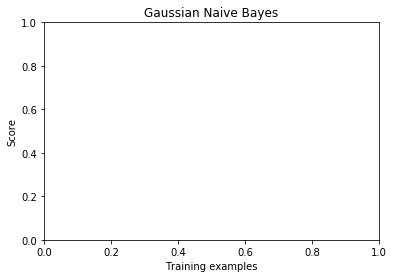

In [52]:
# titanic
#Метод к ближацших соседей

data = pd.read_csv("titanic.csv", sep = ",")
#print(data.describe()) # check if we've loaded right data

data_notna = pd.DataFrame.dropna(data)
#print(data_notna.describe())

X = data_notna[["Pclass", "Fare", "Age", "Sex"]]
X.replace("male", 0, True, None, False)
X.replace("female", 1, True, None, False)
#print(X.loc[:5])

Y = data_notna["Survived"]



color = ["red" if i == 0 else "blue" for i in np.array(Y)]

print("Titanic scatter")

plt.figure()
plt.title("Scatter Pclass-Fare")
plt.scatter(np.array(X.Pclass), np.array(X.Fare), c=color)
plt.show()

plt.figure()
plt.title("Scatter Pclass-Age")
plt.scatter(np.array(X.Pclass), np.array(X.Age), c=color)
plt.show()

plt.figure()
plt.title("Scatter Pclass-Sex")
plt.scatter(np.array(X.Pclass), np.array(X.Sex), c=color)
plt.show()

plt.figure()
plt.title("Scatter Fare-Age")
plt.scatter(np.array(X.Fare), np.array(X.Age), c=color)
plt.show()

plt.figure()
plt.title("Scatter Fare-Sex")
plt.scatter(np.array(X.Fare), np.array(X.Sex), c=color)
plt.show()

neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Установить классификатор knn с k соседями
    clf = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    clf.fit(X,Y)
    #Точность вычислений на тренировочном наборе
    train_accuracy[i] = clf.score(X, Y)
    #Compute accuracy on the test set
    test_accuracy[i] = clf.score(X, Y)

param_grid = {'n_neighbors':np.arange(1,50)}
clf = KNeighborsClassifier()
clf_cv= GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X,Y)
n=clf_cv.best_params_
best=max(n.values())
print(n)
print(X.size)
clf =KNeighborsClassifier(n_neighbors=best)
clf.fit(X, Y)
print(clf.predict(X[:7]))

print("Do they survived?")
n = 1
print(clf.predict(X[5:10]))
print((X[5:11]))

#print(clf.partial_fit)
print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("Gaussian Naive Bayes")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


dat = np.array(X)
#print(dat[:, 1:4])

# построение первых трёх измерений 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(dat[:, 1:4])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()



z=clf.predict(X)
color = ["red" if i == 0 else "blue" for i in np.array(z)]
plt.figure()
plt.title("Scatter Fare-Age")
plt.scatter(np.array(X.Fare), np.array(X.Age), c=color)
plt.show()

plt.figure()
plt.title("Scatter Fare-Sex")
plt.scatter(np.array(X.Fare), np.array(X.Sex), c=color)
plt.show()

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(dat[:, 1:4])
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=color,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [56]:
#Метод парзеновского окна

clf=RadiusNeighborsClassifier(radius=5.0)
clf.fit(X,Y)
print(clf.predict(X[:5]))
print((X[:5]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("RadiusNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()


[1 1 1 1 0]
    Pclass     Fare   Age  Sex
1        1  71.2833  38.0    1
3        1  53.1000  35.0    1
6        1  51.8625  54.0    0
10       3  16.7000   4.0    1
11       1  26.5500  58.0    1


ValueError: No neighbors found for test samples [3, 9, 17], you can try using larger radius, give a label for outliers, or consider removing them from your dataset.

{'n_neighbors': 20}
['B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M']
     17.99  10.38   122.8    1001   0.1184   0.2776   0.3001   0.1471  0.2419  \
14  14.540  27.54   96.73   658.8  0.11390  0.15950  0.16390  0.07364  0.2303   
15  14.680  20.13   94.74   684.5  0.09867  0.07200  0.07395  0.05259  0.1586   
16  16.130  20.68  108.10   798.8  0.11700  0.20220  0.17220  0.10280  0.2164   
17  19.810  22.15  130.00  1260.0  0.09831  0.10270  0.14790  0.09498  0.1582   
18  13.540  14.36   87.46   566.3  0.09779  0.08129  0.06664  0.04781  0.1885   
19  13.080  15.71   85.63   520.0  0.10750  0.12700  0.04568  0.03110  0.1967   
20   9.504  12.44   60.34   273.9  0.10240  0.06492  0.02956  0.02076  0.1815   
21  15.340  14.26  102.50   704.4  0.10730  0.21350  0.20770  0.09756  0.2521   
22  21.160  23.04  137.20  1404.0  0.09428  0.10220  0.10970  0.08632  0.1769   

    0.07871  
14  0.07077  
15  0.05922  
16  0.07356  
17  0.05395  
18  0.05766  
19  0.06811  
20  0.06905  
21  0.07032  
22  0

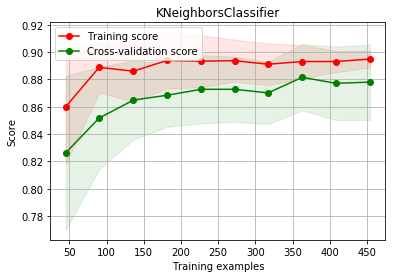

In [57]:
#РАК
# к ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

#nb
data = pd.read_csv("wdbc.data", sep = ",")
data = data.iloc[:,0:12]
#print(data.describe())
X = data.iloc[:,2:12]
Y = data.iloc[:,1]
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Установить классификатор knn с k соседями
    clf = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    clf.fit(X,Y)
    #Точность вычислений на тренировочном наборе
    train_accuracy[i] = clf.score(X, Y)
    #Compute accuracy on the test set
    test_accuracy[i] = clf.score(X, Y)
    
param_grid = {'n_neighbors':np.arange(1,50)}
clf = KNeighborsClassifier()
clf_cv= GridSearchCV(clf,param_grid,cv=5)
clf_cv.fit(X,Y)
n=clf_cv.best_params_
best=max(n.values())
print(n)


clf = KNeighborsClassifier(n_neighbors=best)
clf.fit(X, Y)

#print("Where is malignant cancer?")
n = 1
print(clf.predict(X[14:23]))
print((X[14:23]))

print(cross_val_score(clf, X, Y, cv=10))

plt.figure()
plt.title("KNeighborsClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=241)
train_sizes=np.linspace(.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
        clf, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")

plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

plt.legend(loc="best")

plt.show()

